In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('data/construction_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'data/construction_data.csv'

In [4]:
df.head()

Labor Requirements  Equipment Usage  Material Quantities  \
0                 152               21           752.666578   
1                 142               17          1463.863953   
2                  64               20          1639.016492   
3                 156               12          1250.667964   
4                 121               23          1313.545497   

   Project Duration (days)  Resource Allocation Efficiency  \
0                      291                       79.740040   
1                      348                       71.332190   
2                      341                       91.470780   
3                      278                       75.897926   
4                      318                       80.544442   

   Schedule Optimization  Computation Time (CT)  Best Cost (BC)  \
0                      0             119.105430    9.001976e+05   
1                      1             153.138143    1.056578e+06   
2                      0             101.541888    3.083878e+05   
3                      1             233.622856    5.412628e+05   
4                      0             125.276613    1.142576e+06   

   Evaluation Metric (Nfe)  Mean Resource Demand  SD of Resource Demand  \
0                      180             78.028242              10.530459   
1                      182             90.144405              15.429264   
2                      290             98.225578              12.600627   
3                      295             90.883581              15.876901   
4                      207             93.694853              12.613284   

   Risk Level  
0           0  
1           2  
2           0  
3           2  
4           1

In [9]:
y=df['Labor Requirements']

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 11), (200, 11))

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 43.0503
- Mean Absolute Error: 37.4426
- R2 Score: 0.0122
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.4398
- Mean Absolute Error: 40.1866
- R2 Score: 0.0034


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.1342
- Mean Absolute Error: 37.5998
- R2 Score: 0.0084
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.4227
- Mean Absolute Error: 40.1896
- R2 Score: 0.0041


Ridge
Model performance for Training set
- Root Mean Squared Error: 43.0503
- Mean Absolute Error: 37.4429
- R2 Score: 0.0122
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.4395
- Mean Absolute Error: 40.1866
- R2 Score: 0.0034


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 38.0120
- Mean Absolute Error: 32.1323
- R2 Score: 0.2299
---------

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


Model Name  R2_Score
1                    Lasso  0.004106
2                    Ridge  0.003367
0        Linear Regression  0.003358
8       AdaBoost Regressor -0.011557
5  Random Forest Regressor -0.062648
7    CatBoosting Regressor -0.119110
3    K-Neighbors Regressor -0.132651
6             XGBRegressor -0.254595
4            Decision Tree -1.000348

In [7]:
df.isna().sum()

Labor Requirements                0
Equipment Usage                   0
Material Quantities               0
Project Duration (days)           0
Resource Allocation Efficiency    0
Schedule Optimization             0
Computation Time (CT)             0
Best Cost (BC)                    0
Evaluation Metric (Nfe)           0
Mean Resource Demand              0
SD of Resource Demand             0
Risk Level                        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Labor Requirements              1000 non-null   int64  
 1   Equipment Usage                 1000 non-null   int64  
 2   Material Quantities             1000 non-null   float64
 3   Project Duration (days)         1000 non-null   int64  
 4   Resource Allocation Efficiency  1000 non-null   float64
 5   Schedule Optimization           1000 non-null   int64  
 6   Computation Time (CT)           1000 non-null   float64
 7   Best Cost (BC)                  1000 non-null   float64
 8   Evaluation Metric (Nfe)         1000 non-null   int64  
 9   Mean Resource Demand            1000 non-null   float64
 10  SD of Resource Demand           1000 non-null   float64
 11  Risk Level                      1000 non-null   int64  
dtypes: float64(6), int64(6)
memory usag

In [10]:
df.nunique()

Labor Requirements                 150
Equipment Usage                     25
Material Quantities               1000
Project Duration (days)            366
Resource Allocation Efficiency    1000
Schedule Optimization                2
Computation Time (CT)             1000
Best Cost (BC)                    1000
Evaluation Metric (Nfe)            150
Mean Resource Demand              1000
SD of Resource Demand             1000
Risk Level                           3
dtype: int64

In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['Labor Requirements', 'Equipment Usage', 'Material Quantities', 'Project Duration (days)', 'Resource Allocation Efficiency', 'Schedule Optimization', 'Computation Time (CT)', 'Best Cost (BC)', 'Evaluation Metric (Nfe)', 'Mean Resource Demand', 'SD of Resource Demand', 'Risk Level']

We have 0 categorical features : []


In [7]:
X = df.drop(columns=['Labor Requirements'],axis=1)

In [8]:
X.head()

Equipment Usage  Material Quantities  Project Duration (days)  \
0               21           752.666578                      291   
1               17          1463.863953                      348   
2               20          1639.016492                      341   
3               12          1250.667964                      278   
4               23          1313.545497                      318   

   Resource Allocation Efficiency  Schedule Optimization  \
0                       79.740040                      0   
1                       71.332190                      1   
2                       91.470780                      0   
3                       75.897926                      1   
4                       80.544442                      0   

   Computation Time (CT)  Best Cost (BC)  Evaluation Metric (Nfe)  \
0             119.105430    9.001976e+05                      180   
1             153.138143    1.056578e+06                      182   
2             101.541888    3.083878e+05                      290   
3             233.622856    5.412628e+05                      295   
4             125.276613    1.142576e+06                      207   

   Mean Resource Demand  SD of Resource Demand  Risk Level  
0             78.028242              10.530459           0  
1             90.144405              15.429264           2  
2             98.225578              12.600627           0  
3             90.883581              15.876901           2  
4             93.694853              12.613284           1

In [ ]:
y = df['math_score']

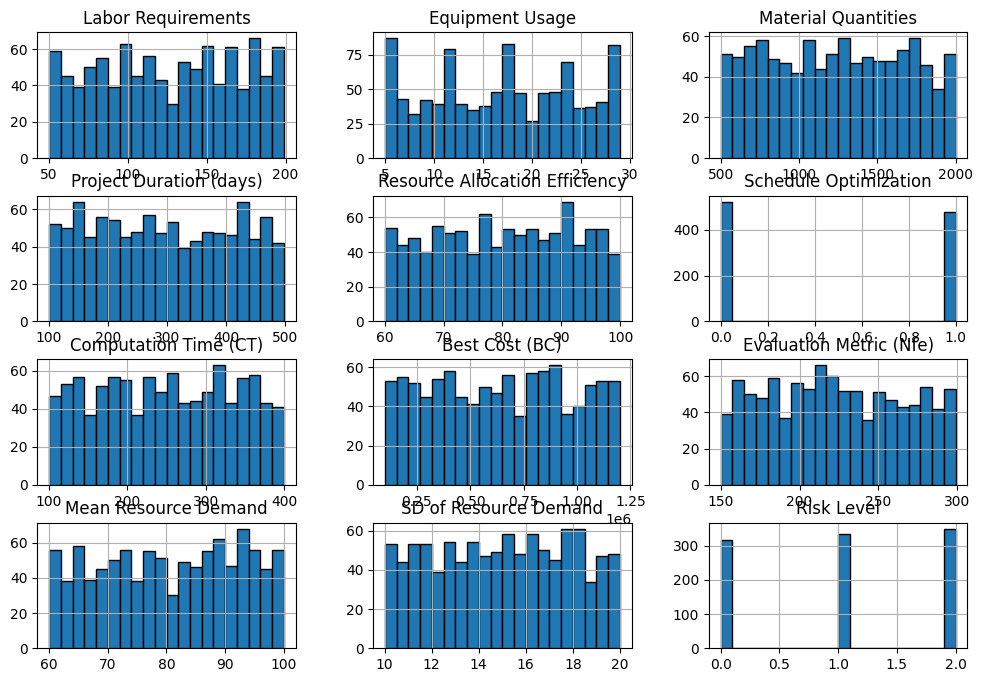

In [12]:
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.show()


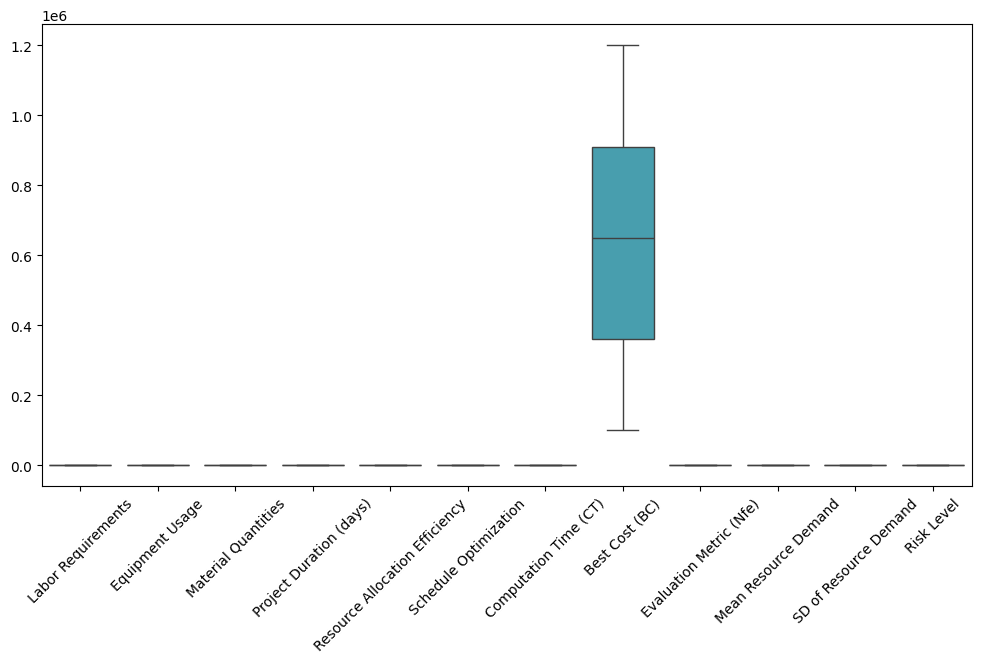

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


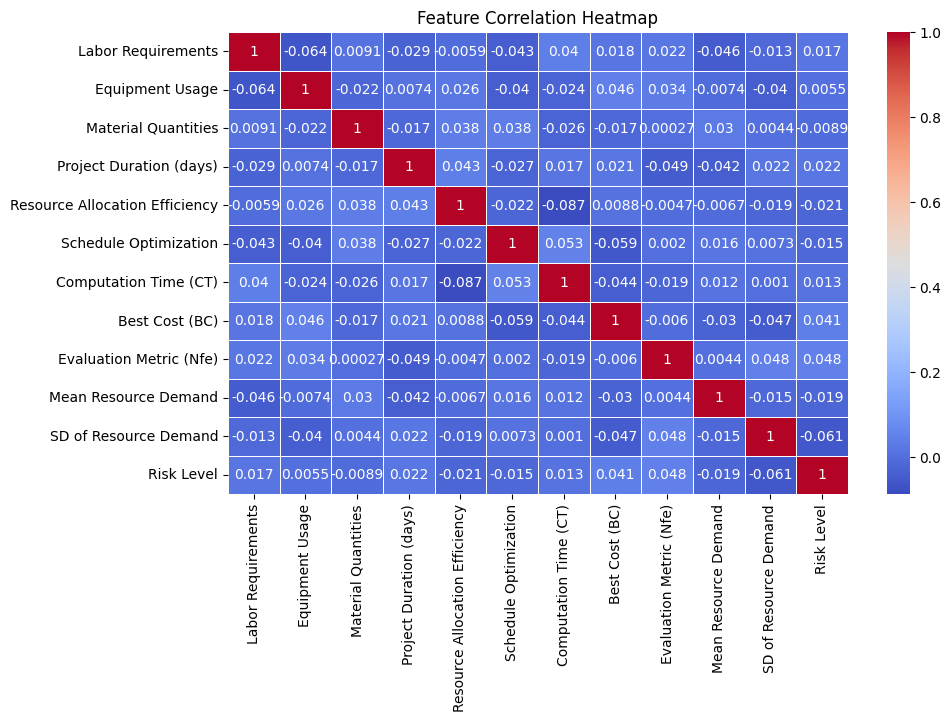

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

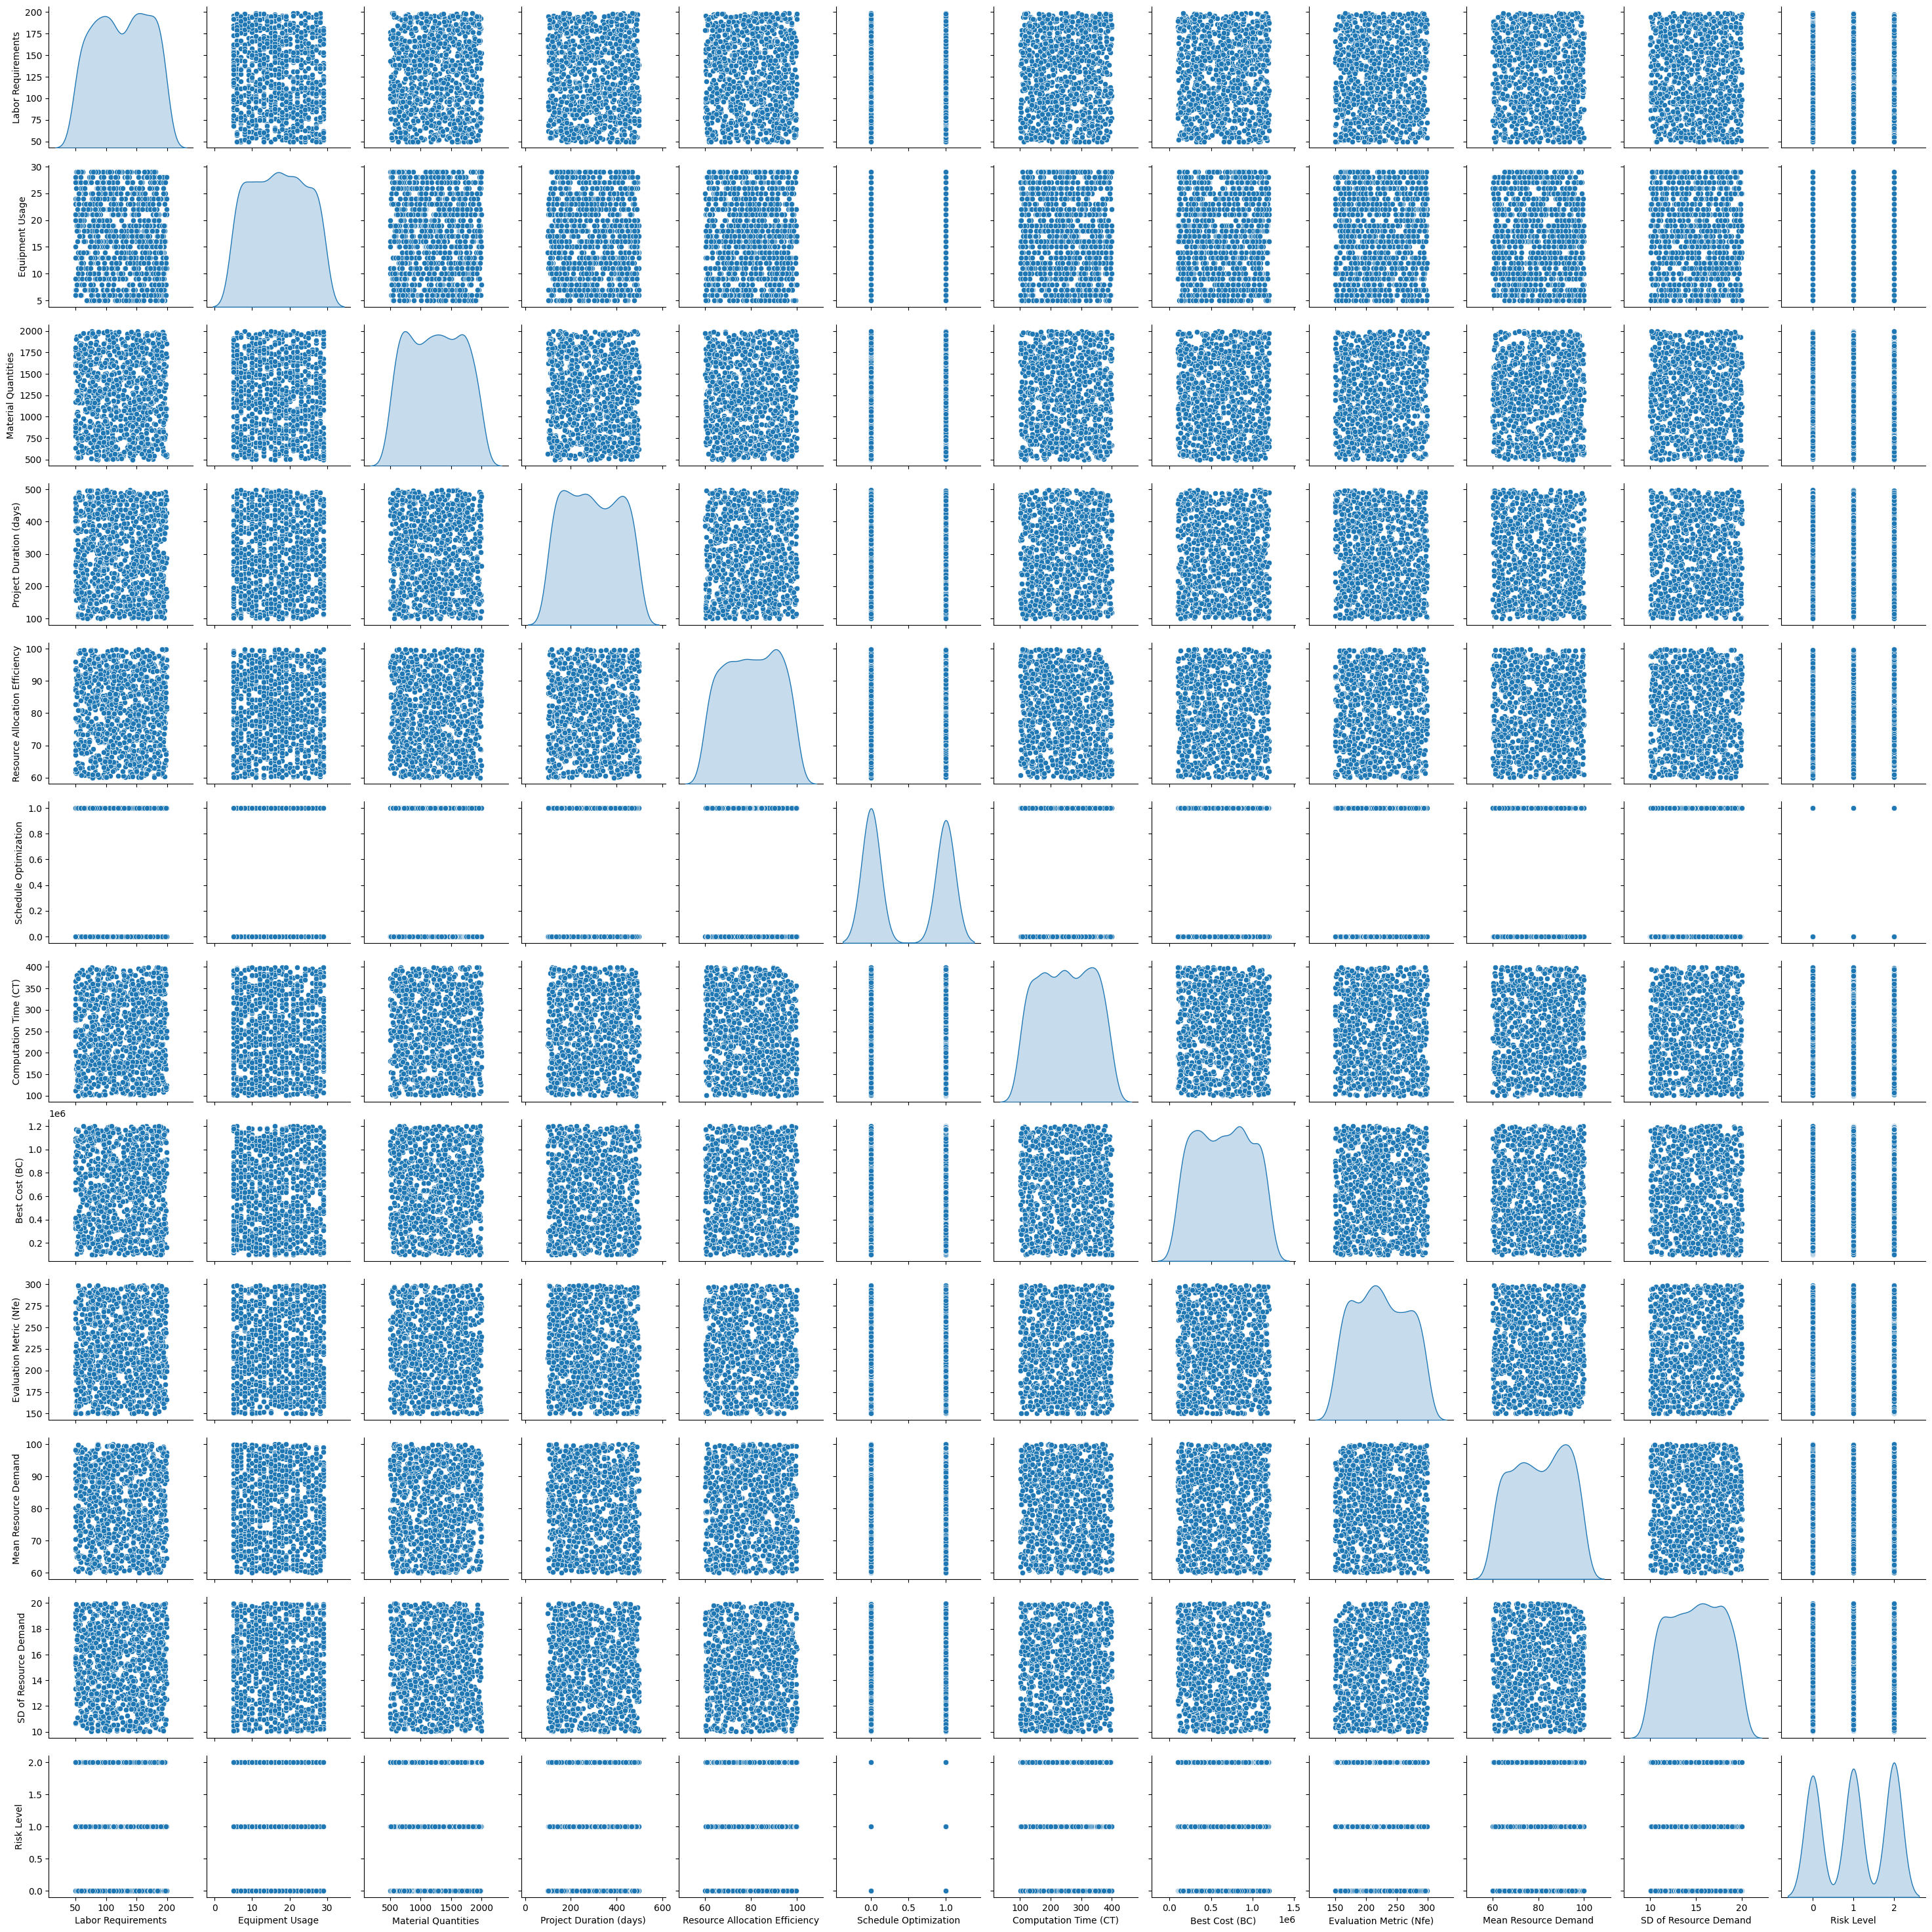

In [15]:
sns.pairplot(df, diag_kind='kde')
plt.show()


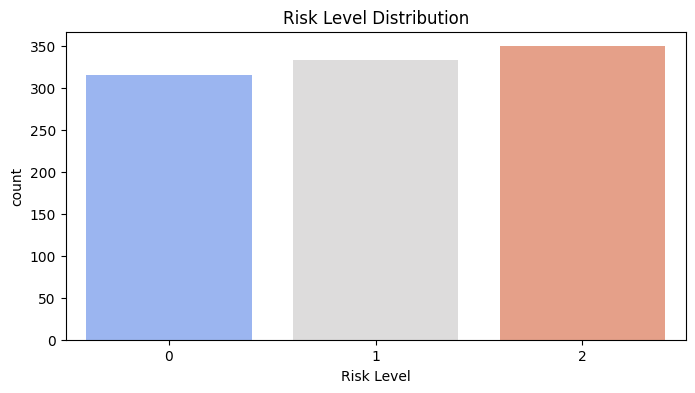

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='Risk Level', data=df, palette='coolwarm')
plt.title("Risk Level Distribution")
plt.show()


In [17]:
from scipy import stats

# Calculate Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define threshold (e.g., 3 standard deviations)
outliers = (z_scores > 3).sum()
print("Outliers in each column:\n", outliers)


Outliers in each column:
 0


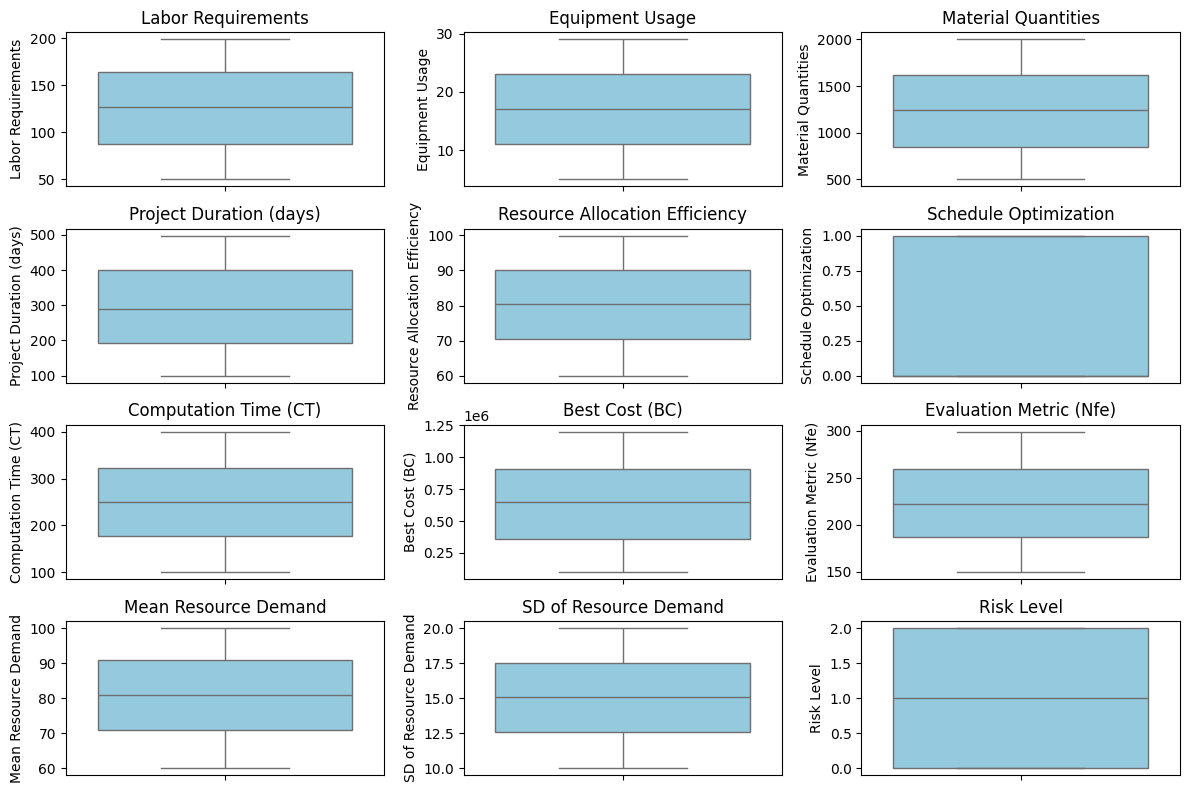

In [18]:
plt.figure(figsize=(12,8))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()
